In [329]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../order_1950/order_105747_data.txt', sep=";")

def description():
    file = open('../order_1950/order_105747_legend.txt', 'r', encoding="latin1")
    lines = file.readlines()
    count = 0
    # Strips the newline character
    for line in lines:
        count += 1
        print("{}: {}".format(count, line.strip()))

In [293]:
df["hto000d0"] = df['hto000d0'].replace('-',0)

In [294]:
df_arosa = df.loc[(df['stn'] == 'ARO')]
df_arosa['time'] = pd.to_datetime(df_arosa['time'], format='%Y%m%d')

/tmp/ipykernel_70975/1616028265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arosa['time'] = pd.to_datetime(df_arosa['time'], format='%Y%m%d')


In [295]:
df_arosa = df_arosa[(df_arosa['time'] > '1950-01-01') & (df_arosa['time'] < '2021-12-31')]

In [296]:
df_arosa['snow'] = df_arosa['hto000d0']

/tmp/ipykernel_70975/40995954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arosa['snow'] = df_arosa['hto000d0']


In [297]:
df_arosa = df_arosa[['time', 'snow']]
df_arosa['snow'] = pd.to_numeric(df_arosa['snow'])

/tmp/ipykernel_70975/2042190804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arosa['snow'] = pd.to_numeric(df_arosa['snow'])


<AxesSubplot:xlabel='time', ylabel='snow'>

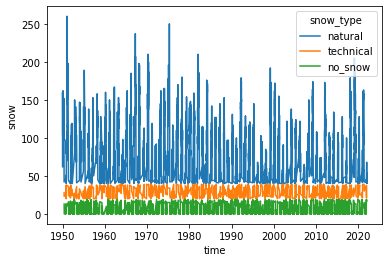

In [298]:
df_arosa.loc[df_arosa["snow"] >= 40, "snow_type"] = "natural"
df_arosa.loc[df_arosa["snow"] < 40, "snow_type"] = "no_snow"
df_arosa.loc[(df_arosa["snow"] < 40) & (df_arosa["snow"]>=20), "snow_type"] = "technical"
sns.lineplot(data=df_arosa, x='time', y='snow', hue='snow_type')

### Per Year Analysis


In [299]:
df_arosa['year'] = df_arosa['time'].dt.year

In [300]:
df_arosa['year'] = df_arosa['time'].dt.year
df_arosa_agg = df_arosa.groupby(["year", "snow_type"]).size()

In [301]:
year_df = df_arosa_agg.reset_index()
df2 = df_arosa.merge(year_df).rename(columns={0:'count'})
df2 = df2[["year", "snow_type", "count"]]

In [302]:
df2 = df2.drop_duplicates()

In [303]:
df2

,year,snow_type,count
0,1950,natural,181
181,1950,technical,11
192,1950,no_snow,172
364,1951,natural,162
526,1951,technical,35
...,...,...,...
25697,2020,technical,9
25706,2020,no_snow,226
25932,2021,natural,160
26092,2021,technical,18


(0.0, 365.0)

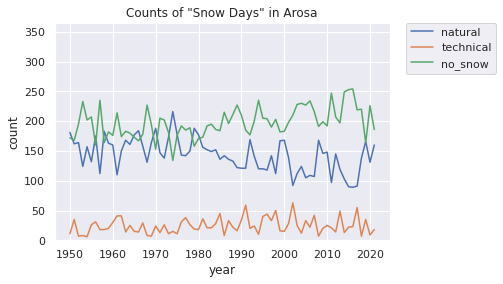

In [340]:
import matplotlib.pyplot as plt

sns.lineplot(data=df2, x="year", y="count", hue="snow_type").set(title='Counts of "Snow Days" in Arosa')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0, 365])

In [305]:
import pandas as pd
import numpy as np
colnames=['stn', 'time', '1', 'snow'] 
df_meiringen = pd.read_csv("../Meiringen_Disentis/meiringen_only.txt", sep=";",
                           index_col=False,
                           header=None,
                           names=colnames)[['stn', 'time', 'snow']]
df_meiringen['time'] = pd.to_datetime(df_meiringen['time'], format='%Y%m%d')
df_meiringen = pd.merge(df_meiringen, df_arosa['time'], on='time', how='right')

In [306]:
#new_df['time'].value_counts()
#df_arosa['time'].value_counts()

df_meiringen.head()

,stn,time,snow
0,NaN,1950-01-02,NaN
1,NaN,1950-01-03,NaN
2,NaN,1950-01-04,NaN
3,NaN,1950-01-05,NaN
4,NaN,1950-01-06,NaN


In [307]:
df_meiringen["snow"] = df_meiringen['snow'].replace('-', np.nan)
df_meiringen["snow"] = pd.to_numeric(df_meiringen["snow"])

In [308]:
df_meiringen['time'].sort_values(ascending=True).value_counts()

1950-01-02    1
1997-12-27    1
1998-01-06    1
1998-01-05    1
1998-01-04    1
             ..
1973-12-30    1
1973-12-29    1
1973-12-28    1
1973-12-27    1
2021-12-30    1
Name: time, Length: 26296, dtype: int64

In [309]:
#df_meiringen['snow'].rolling(3, center=True, min_periods=1)

<AxesSubplot:xlabel='time', ylabel='snow'>

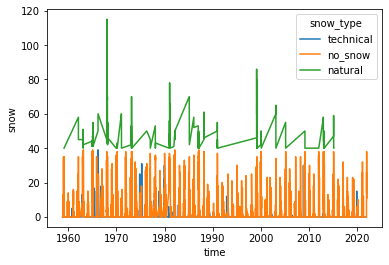

In [310]:
df_meiringen = df_meiringen[(df_meiringen['time'] > '1950-01-01') & (df_meiringen['time'] < '2021-12-31')]
df_meiringen.loc[df_meiringen["snow"] >= 40, "snow_type"] = "natural"
df_meiringen.loc[df_meiringen["snow"] < 40, "snow_type"] = "no_snow"
df_meiringen.loc[(df_meiringen["snow"] < 40) & (df_arosa["snow"]>=20), "snow_type"] = "technical"
sns.lineplot(data=df_meiringen, x='time', y='snow', hue='snow_type')

(0.0, 365.0)

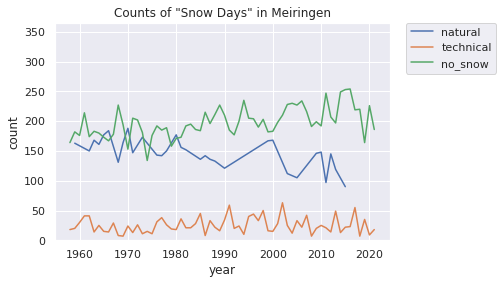

In [342]:
df_meiringen['year'] = df_meiringen['time'].dt.year
df_meiringen_agg = df_meiringen.groupby(["year", "snow_type"]).size()

year_df_meiringen = df_meiringen_agg.reset_index()
df3 = df_meiringen.merge(year_df).rename(columns={0:'count'})
df3 = df3[["year", "snow_type", "count"]]
df3 = df3.drop_duplicates()
sns.set(style="darkgrid")
sns.lineplot(data=df3, x="year", y="count", hue="snow_type", hue_order = ['natural', 'technical', 'no_snow']).set(title='Counts of "Snow Days" in Meiringen')
import matplotlib.pyplot as plt
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0, 365])

(0.0, 365.0)

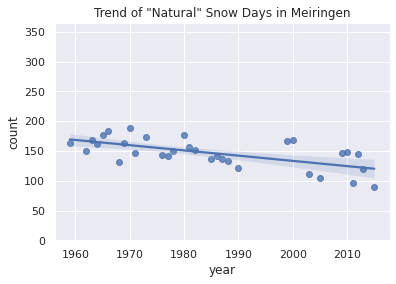

In [338]:
df4 = df3.loc[(df3['snow_type'] == 'natural')]
sns.regplot(x='year', y="count", data=df4).set(title='Trend of "Natural" Snow Days in Meiringen')
plt.ylim([0, 365])

(0.0, 365.0)

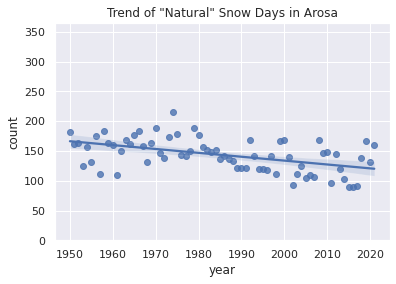

In [337]:
df4 = df2.loc[(df2['snow_type'] == 'natural')]
sns.regplot(x='year', y="count", data=df4).set(title='Trend of "Natural" Snow Days in Arosa')
plt.ylim([0, 365])

In [ ]:
df_meiringen.head()

In [ ]:
df_meiringen['year'] = df_meiringen['time'].dt.year

In [ ]:
df_na = df_meiringen.loc[(df_meiringen['snow'].isna())]
df_na.groupby('time').agg('count')

In [ ]:
times_gaps = df_meiringen['time'] - df_meiringen['time'].shift(1)

In [ ]:
df_meiringen.groupby('year').agg('count').plot()

In [ ]:
df_meiringen['month'] = df_meiringen['time'].dt.month

In [275]:
df_meiringen_check = df_meiringen.loc[(df_meiringen['month'] >= 6) & (df_meiringen['month'] <= 8)]

In [276]:
df_meiringen_check.head()

,stn,time,snow,year,month
212,MER,1959-06-01,0,1959,6
213,MER,1959-06-02,0,1959,6
214,MER,1959-06-03,0,1959,6
215,MER,1959-06-04,0,1959,6
216,MER,1959-06-05,0,1959,6


<AxesSubplot:xlabel='year', ylabel='snow'>

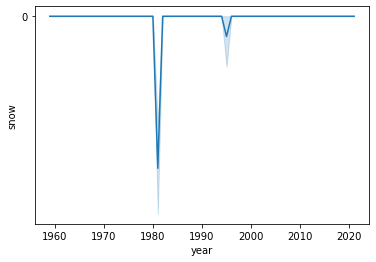

In [277]:
sns.lineplot(data=df_meiringen_check, x='year', y='snow')

In [343]:
sns.set()

In [344]:
df_meiringen.head()

,stn,time,snow,snow_type,year
0,NaN,1950-01-02,NaN,NaN,1950
1,NaN,1950-01-03,NaN,NaN,1950
2,NaN,1950-01-04,NaN,NaN,1950
3,NaN,1950-01-05,NaN,NaN,1950
4,NaN,1950-01-06,NaN,NaN,1950


In [370]:
df_meiringen_temp = pd.read_csv("../Meiringen_Disentis/order_105773_data.txt", sep=";",
                           index_col=False)
df_meiringen_temp = df_meiringen_temp.loc[(df_meiringen_temp['stn'] == "MER")][['time', 'tre200dn']]
df_meiringen_temp['time'] = pd.to_datetime(df_meiringen['time'], format='%Y%m%d')
df_meiringen_temp = pd.merge(df_meiringen_temp, df_arosa['time'], on='time', how='right')
df_meiringen_temp["tre200dn"] = df_meiringen_temp['tre200dn'].replace('-',np.nan)

In [375]:
sns.lineplot(data=df_meiringen_temp, x="year", y="tre200dn")

ValueError: Could not interpret value `year` for parameter `x`